In [186]:
import pandas as pd
import numpy as np
import missingno as miss
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
df = pd.read_csv("processed data.csv")

In [188]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,18-08-2020 12:55,Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...,0.0
1,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497,10737,18-08-2020 12:45,Twitter Web App,@michellegrattan @ConversationEDU This is what...,0.0
2,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,7/5/2013 3:57,918,2561,31837,18-08-2020 12:34,Twitter for Android,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,0.0
3,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",7/2/2015 7:24,2321,3236,264351,18-08-2020 12:30,Twitter for iPhone,"@MSNBC Well, let’s qualify that: would anyone ...",0.0
4,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091,20986,128119,18-08-2020 12:15,Hootsuite Inc.,"Most countries, without the ability to make #V...",0.0


In [189]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
date                 object
source               object
tweet                object
Label               float64
dtype: object

In [190]:
df['date'] = df['date'].astype('datetime64[ns]')

In [191]:
##removing time stamps
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.floor('d')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,2020-08-18,Twitter Web App,Australia to Manufacture Covid-19 Vaccine and ...,0.0
1,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497,10737,2020-08-18,Twitter Web App,@michellegrattan @ConversationEDU This is what...,0.0
2,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,7/5/2013 3:57,918,2561,31837,2020-08-18,Twitter for Android,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,0.0
3,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",7/2/2015 7:24,2321,3236,264351,2020-08-18,Twitter for iPhone,"@MSNBC Well, let’s qualify that: would anyone ...",0.0
4,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091,20986,128119,2020-08-18,Hootsuite Inc.,"Most countries, without the ability to make #V...",0.0


In [192]:
## jan 4th -- mass vaccination roll out 
## https://www.ajmc.com/view/a-timeline-of-covid-19-vaccine-developments-in-2021
##https://apnews.com/article/joe-biden-coronavirus-pandemic-coronavirus-vaccine-6b624ae3a0ebdda0d91e867d59c8ca46? -- feb 25th
new = df[(df['date'] > '2021-01-05') & (df['date'] < '2021-03-31')]

new.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
29092,KPIX 5,San Francisco Bay Area,"News, Sports, Weather, Traffic & the Best of t...",10/8/2008 22:43,102655,1908,1661,2021-01-15,Twitter Web App,COVID-19 NEWS ROUNDUP\nConfusion over the #Cov...,NaN
29093,The Proud Patriot,Everywhere,#NRA #2A 🇺🇸 #BlueLivesMatter https://t.co/P8sb...,4/3/2013 10:23,10266,8889,76229,2021-01-15,Twitter for iPhone,23 die in Norway after receiving Pfizer COVID-...,NaN
29094,Doron Dorfman,"Syracuse, NY",Assoc. Professor @SUCollegeofLaw. Disability L...,6/12/2018 2:53,1707,1291,22622,2021-01-15,Twitter for iPhone,So this just happened 🎉\nThank you to ⁦@NYGov⁩...,NaN
29095,Daxesh Mavani,"Surat, India",Bjym state commite member Gujrat | sec: vatsal...,6/18/2012 14:22,4172,334,10569,2021-01-15,Twitter for Android,It is recommended that everyone should complet...,NaN
29096,UR Medicine,"Rochester, New York",We're one of the nation's top academic medical...,11/11/2008 17:51,7706,861,4560,2021-01-15,Twitter for iPhone,We started vaccinating our patients today. 93...,NaN


In [193]:
new.shape 

(112013, 11)

In [194]:
## let us drop all the tweets other than from us 

In [195]:
new.user_location.value_counts()

India                         2119
United States                 1894
London, England               1861
London                        1626
United Kingdom                1189
                              ... 
Canal Fulton, OH                 1
Liverpool, England 📌             1
Federal Prison                   1
~ Fight Evil, Read Books ~       1
Right here!                      1
Name: user_location, Length: 20530, dtype: int64

In [196]:
##we dont need all country tweets !

top_jan = new['user_location'][pd.DatetimeIndex(new['date']).month == 1].value_counts()
top_feb = new['user_location'][pd.DatetimeIndex(new['date']).month == 2].value_counts()
top_march = new['user_location'][pd.DatetimeIndex(new['date']).month == 3].value_counts()
top_all_the_time = (top_march + top_feb + top_jan).sort_values(ascending = False)
top_all_the_time.head(60)


India                           2119.0
United States                   1894.0
London, England                 1861.0
London                          1626.0
United Kingdom                  1189.0
Washington, DC                  1119.0
New York, NY                     917.0
UK                               840.0
England, United Kingdom          803.0
Los Angeles, CA                  756.0
Boston, MA                       753.0
Chicago, IL                      752.0
New Delhi, India                 673.0
USA                              643.0
Canada                           611.0
Houston, TX                      554.0
London, UK                       553.0
Atlanta, GA                      551.0
Philadelphia, PA                 518.0
England                          513.0
Toronto, Ontario                 490.0
Ireland                          474.0
Mumbai, India                    472.0
New York                         469.0
New York, USA                    460.0
California, USA          

In [197]:
top_all_the_time.to_csv("C:/Users/VIOLIN/Desktop/DS 2 Project/country.csv", sep=',',index=False)

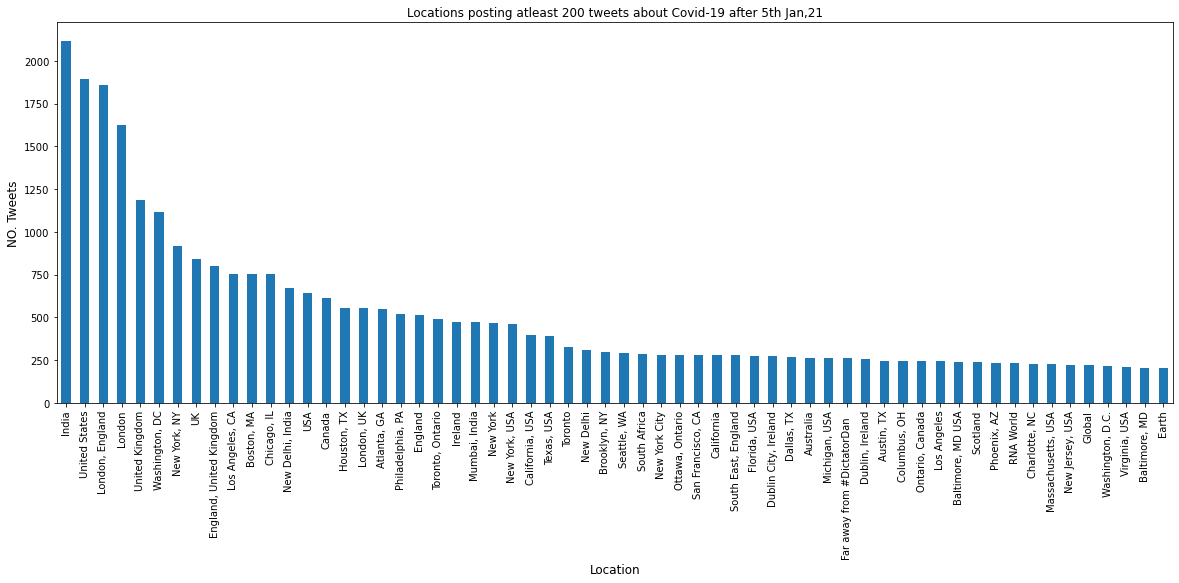

In [208]:


fig, ax = plt.subplots(figsize = (20,7))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_all_the_time[0:60].plot(kind='bar', title = "Locations posting atleast 200 tweets about Covid-19 after 5th Jan,21",)
plt.savefig("initial user location.png")
plt.show()


In [199]:

country = ['United States','Washington, DC', 'New York, NY', 'Los Angeles, CA','Chicago, IL','USA','Houston, TX','Atlanta, GA','Philadelphia, PA','New York','New York, USA','California, USA','Texas, USA','Brooklyn, NY','Seattle, WA','New York City','San Francisco, CA','California ','Florida, USA ','Dallas, TX ','Michigan, USA','Austin, TX','Los Angeles ','Baltimore, MD USA','Phoenix, AZ','Charlotte, NC','Massachusetts, USA','New Jersey, USA','Washington, D.C.','Virginia, USA','Baltimore, MD']
new2 = new[new.user_location.isin(country)]
new2.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
29103,My Budget Adviser 🇺🇲,United States,Veteran |Husband |Dad |Author |Wells Fargo VP ...,8/15/2017 15:36,88,283,2834,2021-01-15,Twitter for Android,#BreakingNews #BREAKING \n\nThe #IRS delays st...,NaN
29123,Sema Sgaier,"Washington, DC","Working through pandemics: #COVID19, #HIV, #TB...",11/23/2011 7:24,872,560,1832,2021-01-15,Twitter Web App,New findings fr @SurgoVentures survey of U.S....,NaN
29126,Jessie Vargas Loera,"Texas, USA",A lefty in the right state of mind,4/12/2011 18:49,188,618,12715,2021-01-15,Twitter for iPhone,Help spread the word! #COVID19 #CovidVaccine #...,NaN
29134,The IZ Partnership,"Houston, TX",We are unapologetic advocates of immunization....,11/16/2008 21:16,2148,2212,569,2021-01-15,Twitter Web App,TIP president and CEO Allison Winnike on #Covi...,NaN
29142,Dr. Kirsten Brown,"Washington, DC",Associate Professor & Vice Chair for Education...,3/12/2010 14:03,1691,1203,13349,2021-01-15,Twitter for Android,"#HappyFriday from my 76 year-old mother, Kay B...",NaN


In [200]:
new2.shape

(12914, 11)

In [201]:
new2.to_csv("C:/Users/VIOLIN/Desktop/DS 2 Project/master_new.csv", sep=',',index=False)

In [202]:
dat = pd.read_csv("labelled_data.csv")
dat.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,source,tweet,Label
0,My Budget Adviser 🇺🇲,United States,Veteran |Husband |Dad |Author |Wells Fargo VP ...,8/15/2017 15:36,88,283,2834,1/15/2021,Twitter for Android,#BreakingNews #BREAKING \n\nThe #IRS delays st...,0.0
1,Sema Sgaier,"Washington, DC","Working through pandemics: #COVID19, #HIV, #TB...",11/23/2011 7:24,872,560,1832,1/15/2021,Twitter Web App,New findings fr @SurgoVentures survey of U.S....,0.0
2,Jessie Vargas Loera,"Texas, USA",A lefty in the right state of mind,4/12/2011 18:49,188,618,12715,1/15/2021,Twitter for iPhone,Help spread the word! #COVID19 #CovidVaccine #...,0.0
3,The IZ Partnership,"Houston, TX",We are unapologetic advocates of immunization....,11/16/2008 21:16,2148,2212,569,1/15/2021,Twitter Web App,TIP president and CEO Allison Winnike on #Covi...,0.0
4,Dr. Kirsten Brown,"Washington, DC",Associate Professor & Vice Chair for Education...,3/12/2010 14:03,1691,1203,13349,1/15/2021,Twitter for Android,"#HappyFriday from my 76 year-old mother, Kay B...",0.0


In [203]:
dat.shape

(12914, 11)

In [204]:
# Checking any Missing Values
dat.isnull().any()

user_name           False
user_location       False
user_description    False
user_created        False
user_followers      False
user_friends        False
user_favourites     False
date                False
source              False
tweet               False
Label                True
dtype: bool

In [205]:
data = dat.dropna()
data.shape

(3999, 11)

In [206]:
data.to_csv("C:/Users/VIOLIN/Desktop/DS 2 Project/final_data.csv", sep=',',index=False)